In [1]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define qubits
qubits = [cirq.GridQubit(x, y) for x in range(2) for y in range(2)]

# Example circuit
circuit = cirq.Circuit()
circuit.append([cirq.H(q) for q in qubits])  # Apply Hadamard gate to each qubit
circuit.append([cirq.CNOT(qubits[0], qubits[1]), cirq.CNOT(qubits[2], qubits[3])])  # CNOT gates
circuit.append([cirq.measure(*qubits, key='result')])

# Visualize the circuit
print("Circuit:")
print(circuit)

Circuit:
(0, 0): ───H───@───M('result')───
               │   │
(0, 1): ───H───X───M─────────────
                   │
(1, 0): ───H───@───M─────────────
               │   │
(1, 1): ───H───X───M─────────────


In [5]:
# Larger circuit with 10 qubits
large_qubits = [cirq.LineQubit(i) for i in range(10)]
large_circuit = cirq.Circuit()
large_circuit.append([cirq.H(q) for q in large_qubits])
for i in range(9):
    large_circuit.append(cirq.CNOT(large_qubits[i], large_qubits[i + 1]))

# Add measurement gates to the circuit
large_circuit.append([cirq.measure(q, key=f'm{i}') for i, q in enumerate(large_qubits)])

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.run(large_circuit, repetitions=1000)

# Visualize the results
print("Simulation with 10 qubits:")
for i, q in enumerate(large_qubits):
    print(f"Qubit {i} measurement outcomes:")
    print(result.histogram(key=f'm{i}'))

Simulation with 10 qubits:
Qubit 0 measurement outcomes:
Counter({0: 513, 1: 487})
Qubit 1 measurement outcomes:
Counter({0: 507, 1: 493})
Qubit 2 measurement outcomes:
Counter({0: 522, 1: 478})
Qubit 3 measurement outcomes:
Counter({1: 533, 0: 467})
Qubit 4 measurement outcomes:
Counter({0: 512, 1: 488})
Qubit 5 measurement outcomes:
Counter({1: 508, 0: 492})
Qubit 6 measurement outcomes:
Counter({1: 511, 0: 489})
Qubit 7 measurement outcomes:
Counter({0: 503, 1: 497})
Qubit 8 measurement outcomes:
Counter({1: 536, 0: 464})
Qubit 9 measurement outcomes:
Counter({0: 511, 1: 489})


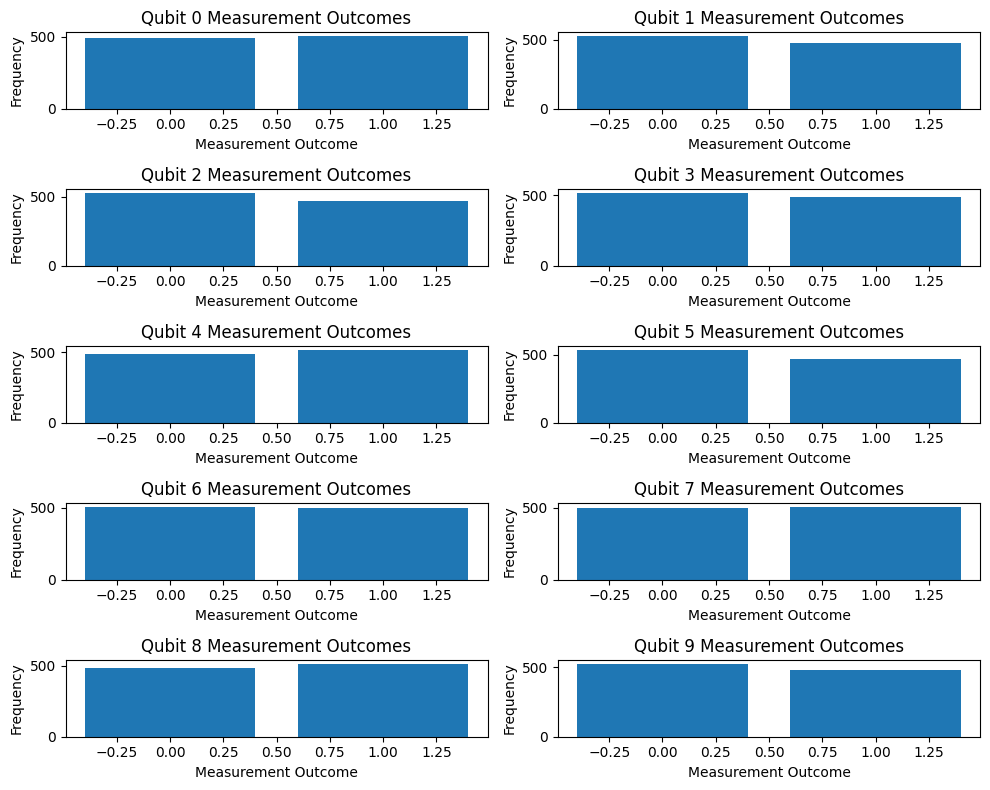

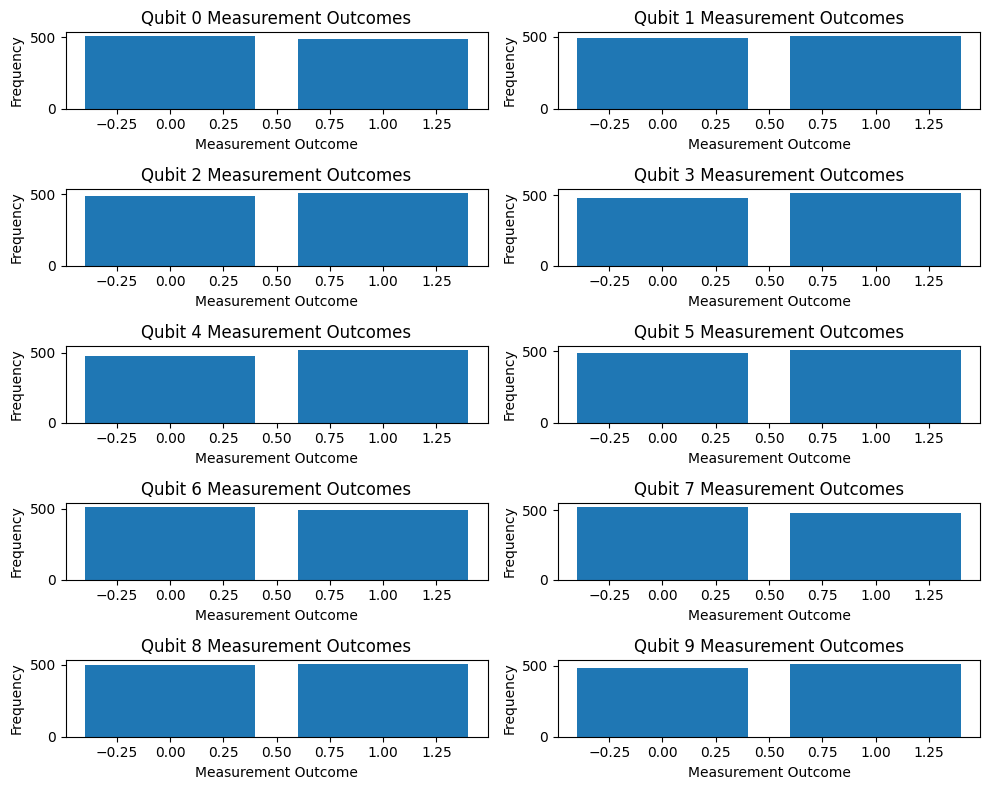

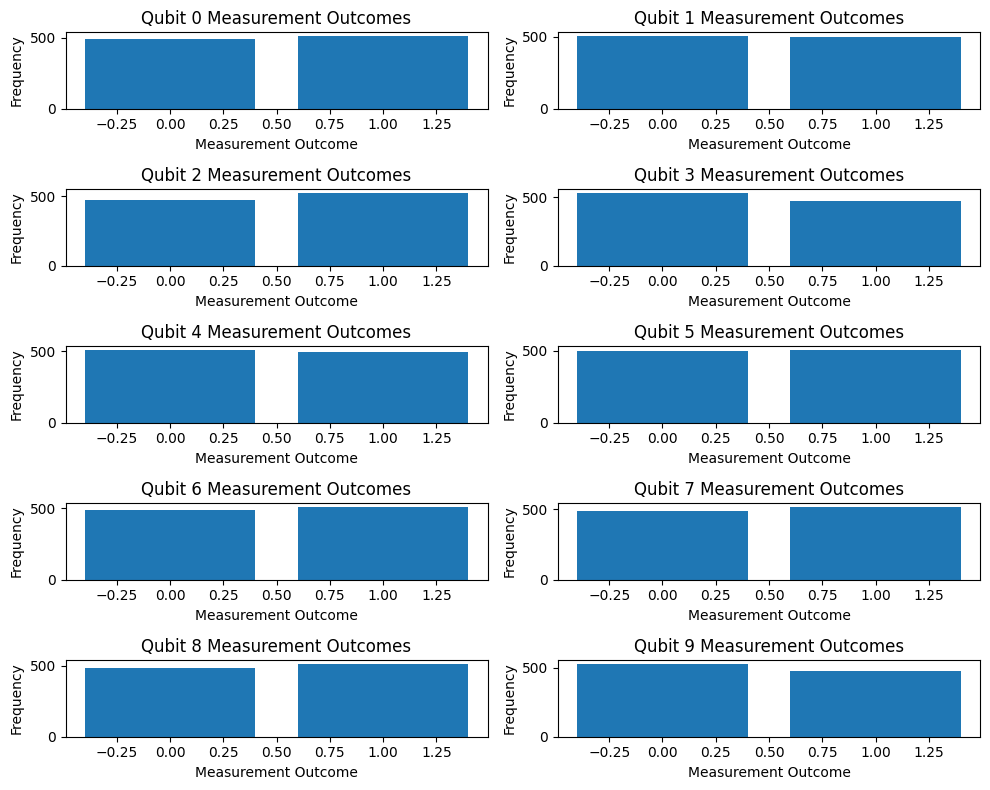

In [6]:
import time

def continuously_run_simulation():
    while True:
        result = simulator.run(large_circuit, repetitions=1000)
        plt.figure(figsize=(10, 8))
        for i, q in enumerate(large_qubits):
            histogram = result.histogram(key=f'm{i}')
            plt.subplot(5, 2, i+1)  # Adjust the grid size according to the number of qubits
            plt.bar(histogram.keys(), histogram.values())
            plt.title(f'Qubit {i} Measurement Outcomes')
            plt.xlabel('Measurement Outcome')
            plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
        time.sleep(5)  # Wait for 5 seconds before next run

continuously_run_simulation()